# Data Analysis and Preparation for CF Book Recommender System 

### About the dataset
- Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.
- Oraganized into three CSV files, BX-Book-Ratings.csv, BX-Users.csv, BX_Books.csv
- Downloadable at https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset?resource=download-directory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

/var/folders/by/v7dmyyw51513bjzxg4zzg4_w0000gn/T/ipykernel_25765/266845322.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# create file paths for each CSV file
file_path_Ratings = 'Book reviews/BX-Book-Ratings.csv'

# Load the CSV file into  DataFrames and handle errors
df_Ratings = pd.read_csv(file_path_Ratings, encoding='windows-1252', sep=';', on_bad_lines="skip")

# Display the first 5 rows of the DataFrames
df_Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [3]:
file_path_Books = 'Book reviews/BX_Books.csv'
df_Books = pd.read_csv(file_path_Books, encoding='windows-1252',sep=';', on_bad_lines="skip")
df_Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
file_path_Users = 'Book reviews/BX-Users.csv'
df_Users = pd.read_csv(file_path_Users,  encoding='windows-1252',sep=';', on_bad_lines="skip")
df_Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Some Data Analysis:

In [5]:
# counting non-zero ratings
df_Ratings_no_zeros = df_Ratings.copy()
# Replace 0 values with NaN in the 'Book-Rating' column
df_Ratings_no_zeros['Book-Rating'] = df_Ratings_no_zeros['Book-Rating'].replace(0, np.nan)
# Drop rows with NaN values (which were 0 before)
df_Ratings_no_zeros = df_Ratings_no_zeros.dropna(subset=['Book-Rating'])

ratings_count = len(df_Ratings_no_zeros)
book_count = df_Ratings['ISBN'].nunique()
user_count = df_Ratings['User-ID'].nunique()

print(f"Number of ratings: {ratings_count}")
print(f"Number of unique books: {book_count}")
print(f"Number of unique users: {user_count}")
print(f"Average number of ratings per user: {round(ratings_count/user_count, 2)}")
print(f"Average number of ratings per book: {round(ratings_count/book_count, 2)}")

Number of ratings: 433671
Number of unique books: 340556
Number of unique users: 105283
Average number of ratings per user: 4.12
Average number of ratings per book: 1.27


In [6]:
# calculate mean ratings
print(f"Mean global rating: {round(df_Ratings_no_zeros['Book-Rating'].mean(),2)}")

user_mean_ratings = df_Ratings_no_zeros.groupby('User-ID')['Book-Rating'].mean()
book_mean_ratings = df_Ratings_no_zeros.groupby('ISBN')['Book-Rating'].mean()

print(f"Mean rating per user: {round(user_mean_ratings.mean(),2)}")
print(f"Mean rating per book: {round(book_mean_ratings.mean(),2)}")

Mean global rating: 7.6
Mean rating per user: 7.46
Mean rating per book: 7.49


/var/folders/by/v7dmyyw51513bjzxg4zzg4_w0000gn/T/ipykernel_25765/1091077376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Book-Rating", data=df_Ratings, palette="rocket")


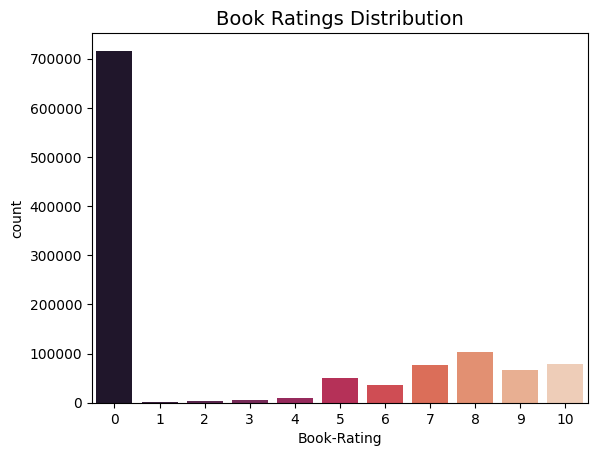

In [7]:
# plotting Book Ratings Distribution
sns.countplot(x="Book-Rating", data=df_Ratings, palette="rocket")
plt.title("Book Ratings Distribution", fontsize=14)
plt.show()

/var/folders/by/v7dmyyw51513bjzxg4zzg4_w0000gn/T/ipykernel_25765/3297451585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Book-Rating", data=df_Ratings_no_zeros, palette="rocket")


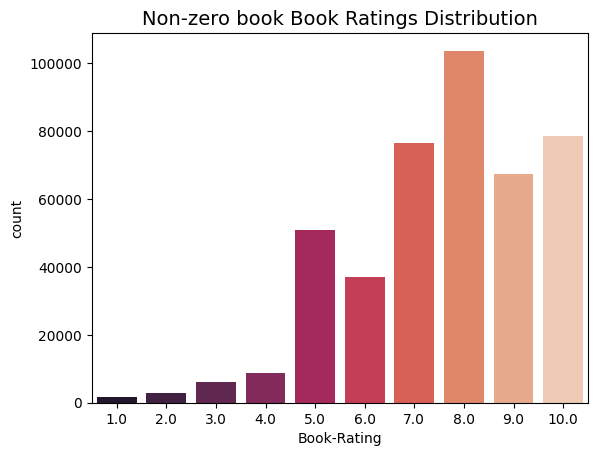

In [8]:
# plotting Non-zero Book Ratings Distribution
sns.countplot(x="Book-Rating", data=df_Ratings_no_zeros, palette="rocket")
plt.title("Non-zero book Book Ratings Distribution", fontsize=14)
plt.show()

In [9]:
def utility_matrix(df):
    """
    creates a sparse utility matrix from BX-Book-Ratings dataframe

    Args:
        df: pandas ratings dataframe containing 3 columns (User-ID, ISBN, Book-Rating)

    Returns:
        UMX: sparse matrix
        book_to_index: book to index mapper 
        user_to_index: user to index mapper 
        index_to_book: index to book mapper 
        index_to_user: index to user mapper
    """
    I = df['ISBN'].nunique() # count unique number of books
    J = df['User-ID'].nunique() # count unique number of users

    # MAPPERS
    # map each unique ISBN to a unique index
    book_to_index = dict(zip(np.unique(df["ISBN"]), list(range(I))))

    # map each unique User-ID to a unique index
    user_to_index = dict(zip(np.unique(df["User-ID"]), list(range(J))))

    
    # INVERSE MAPPERS
    # map each book index back to its ISBN
    index_to_book = dict(zip(list(range(I)), np.unique(df["ISBN"])))
    
    # map each user index back to its ID
    index_to_user = dict(zip(list(range(J)), np.unique(df["User-ID"])))

    # prepare the data to be placed in the sparse matrix
    book_index = [book_to_index[i] for i in df['ISBN']]
    user_index = [user_to_index[i] for i in df['User-ID']]

    # buil the sparse utility matrix
    UMX = csr_matrix((df["Book-Rating"], (book_index,user_index)), shape=(I,J))

    return UMX, book_to_index, user_to_index, index_to_book, index_to_user


In [10]:
UMX, book_to_index, user_to_index, index_to_book, index_to_user = utility_matrix(df_Ratings)

# sparsity of the matrix = # of non-zero elements / matrix size
print(f"Sparsity: {round(UMX.nnz / (UMX.shape[0]*UMX.shape[1]) *100,4)}%")

Sparsity: 0.0032%


# ALS

## Data preparation

In [11]:
from pyspark.sql import SparkSession, Row
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

In [12]:
filename = 'Book reviews/BX-Book-Ratings.csv'
seed = 12345

# Initialize Spark session
spark = SparkSession.builder.appName("ALSRecommender").getOrCreate()

# Load data from a CSV file, considering semicolon delimiter and quotes
data = spark.read.csv(filename, header=True, inferSchema=True, sep=';', quote='"')

# Select and rename the columns according to the CSV file's format
ratings = data.select(
    col('User-ID').cast('int').alias('userId'), 
    col('ISBN').alias('bookId'), 
    col('Book-Rating').cast('int').alias('rating')
)


# Transform the ISBN string to an index using StringIndexer
stringIndexer = StringIndexer(inputCol="bookId", outputCol="bookIdIndexed")
model = stringIndexer.fit(ratings)
ratingsIndexed = model.transform(ratings)

# filter out users with less than 3 ratings
userRatingTreshold = 3
ratingsFiltered = ratingsIndexed.groupBy("userId").count().filter(col("count") > userRatingTreshold)
ratingsFiltered = ratingsFiltered.select("userId")

ratingsIndexed = ratingsIndexed.join(ratingsFiltered, "userId", "inner")

#filter top 10% of books
bookRatingTreshold = 0.9
ratingsFiltered = ratingsIndexed.groupBy("bookIdIndexed").count().filter(col("count") > bookRatingTreshold)
ratingsFiltered = ratingsFiltered.select("bookIdIndexed")

ratingsIndexed = ratingsIndexed.join(ratingsFiltered, "bookIdIndexed", "inner")

# Split data into training and test sets
(training, test) = ratingsIndexed.randomSplit([0.8, 0.2], seed=seed)

24/04/06 13:49:02 WARN Utils: Your hostname, Anhs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.215 instead (on interface en0)
24/04/06 13:49:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/06 13:49:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Modeling

In [13]:
als = ALS(userCol='userId', itemCol='bookIdIndexed', ratingCol='rating',
          coldStartStrategy='drop', nonnegative=True)


param_grid = ParamGridBuilder()\
             .addGrid(als.rank, [1, 20, 30])\
             .addGrid(als.maxIter, [20])\
             .addGrid(als.regParam, [.05, .15])\
             .build()
evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')

cv = CrossValidator(
        estimator=als,
        estimatorParamMaps=param_grid,
        evaluator=evaluator,
        numFolds=3)

model = cv.fit(training)

best_model = model.bestModel
print('rank: ', best_model.rank)
print('MaxIter: ', best_model._java_obj.parent().getMaxIter())
print('RegParam: ', best_model._java_obj.parent().getRegParam())

24/04/06 13:49:08 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/04/06 13:49:09 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:11 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/04/06 13:49:11 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:12 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:13 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:13 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:15 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:17 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:17 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:18 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:49:18 WARN InstanceBuilder: Fai

rank:  30
MaxIter:  20
RegParam:  0.15


In [14]:
predictions = best_model.transform(test)

evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')
ALSrmse = evaluator.evaluate(predictions)
print(f'Root Mean Squared Error (RMSE): {ALSrmse}')

24/04/06 13:59:09 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:59:09 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 13:59:11 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/04/06 13:59:11 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/04/06 13:59:13 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/04/06 13:59:13 WARN DAGScheduler: Broadcasting large task binary with size 10.3 MiB
24/04/06 13:59:15 WARN DAGScheduler: Broadcasting large task binary with size 10.3 MiB


Root Mean Squared Error (RMSE): 3.8381797966041016


24/04/06 13:59:16 WARN DAGScheduler: Broadcasting large task binary with size 10.3 MiB


# User-User collaborative filtering

In [15]:
from pyspark.sql import SparkSession, Row
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

### data preparation

In [16]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import dask.dataframe as dd
from sklearn.model_selection import train_test_split


ddf = dd.read_csv('Book reviews/BX-Book-Ratings.csv', sep=';', encoding='latin-1',dtype={'User-ID': 'int32', 'Book-Rating': 'int8', 'ISBN': 'category'})

rating_summary = ddf.groupby('ISBN')['Book-Rating'].mean().compute()

df = ddf.compute()

#df = df[df['Book-Rating'] > 0] 

# filter out users with less than 3 ratings
user_rating_treshold = 3
user_rating_count = df['User-ID'].value_counts()
active_users = user_rating_count[user_rating_count >= user_rating_treshold].index
df = df[df['User-ID'].isin(active_users)]

# filter top 10% of books
book_rating_treshold = 0.9
book_rating_count = df['ISBN'].value_counts()
popular_books = book_rating_count[book_rating_count >= book_rating_treshold].index
df = df[df['ISBN'].isin(popular_books)]
num_records = df.shape[0]
print(f"Number of records in filtered dataset: {num_records}")
df = df.head(100000)

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
num_records_train = train_data.shape[0]
print(f"Number of records in train_data: {num_records_train}")

# Number of records in test_data
num_records_test = test_data.shape[0]
print(f"Number of records in test_data: {num_records_test}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/groupby.py:1487: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self._meta = self.obj._meta.groupby(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/groupby.py:430: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(level=levels, sort=sort, **observed, **dropna)


Number of records in filtered dataset: 1065610
Number of records in train_data: 80000
Number of records in test_data: 20000


### Modeling

In [17]:

# create user-item interaction matrix
ratings_matrix = train_data.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)


# calculate the cosine similarity of the users
cosine_sim = cosine_similarity(ratings_matrix, ratings_matrix)

# convert the similarity matrix into a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=ratings_matrix.index, columns=ratings_matrix.index)

# create a df with the 5 most similar users for each user
top_5_similar_users = {}
for user in cosine_sim_df.columns:
    top_5_similar_users[user] = cosine_sim_df[user].sort_values(ascending=False)[1:6]
    
top_5_similar_users_df = pd.DataFrame(top_5_similar_users)


# predict the rating that a user would give to a book using mean of top 5 similar users
def predict_rating(user_id, book_id):
    if user_id in top_5_similar_users_df.columns and book_id in ratings_matrix.columns:
        top_5_similar = top_5_similar_users_df[user_id]
    
        # Get the ratings of the top 5 similar users for the book
        ratings = []
        for user in top_5_similar.index:
            # Ensure the user is in the ratings_matrix to avoid KeyError
            if user in ratings_matrix.index:
                rating = ratings_matrix.loc[user, book_id]
                ratings.append(rating)
        
        # Calculate the mean rating if there are any ratings
        prediction = np.mean(ratings) if ratings else 0
    else:
        # Default prediction if the user or book is not found
        prediction = 0
    
    return prediction


# get the mean rating for each row in df and put it in predictions column
test_data['prediction'] = test_data.apply(lambda x: predict_rating(x['User-ID'], x['ISBN']), axis=1)

# calculate the RMSE
UserUserrmse = np.sqrt(np.mean((test_data['Book-Rating'] - test_data['prediction'])**2))
print(UserUserrmse)

5.002117872773338


## Standard Dev

Standard Dev used to compare the two other models to a model that always predict the average rating of the whole dataset

In [18]:
# Initialize Spark session
spark = SparkSession.builder.appName("Stddev").getOrCreate()

# Load data from a CSV file, considering semicolon delimiter and quotes
data = spark.read.csv("Book reviews/BX-Book-Ratings.csv", header=True, inferSchema=True, sep=';', quote='"')

# Select and rename the columns according to the CSV file's format
ratings = data.select(
    col('User-ID').cast('int').alias('userId'), 
    col('ISBN').alias('bookId'), 
    col('Book-Rating').cast('int').alias('rating')
)


# Transform the ISBN string to an index using StringIndexer
stringIndexer = StringIndexer(inputCol="bookId", outputCol="bookIdIndexed")
model = stringIndexer.fit(ratings)
ratingsIndexed = model.transform(ratings)

# filter out users with less than 3 ratings
userRatingTreshold = 3
ratingsFiltered = ratingsIndexed.groupBy("userId").count().filter(col("count") > userRatingTreshold)
ratingsFiltered = ratingsFiltered.select("userId")

ratingsIndexed = ratingsIndexed.join(ratingsFiltered, "userId", "inner")

#filter top 10% of books
bookRatingTreshold = 0.9
ratingsFiltered = ratingsIndexed.groupBy("bookIdIndexed").count().filter(col("count") > bookRatingTreshold)
ratingsFiltered = ratingsFiltered.select("bookIdIndexed")

ratingsIndexed = ratingsIndexed.join(ratingsFiltered, "bookIdIndexed", "inner")


# get the standard deviation of the ratings for the whole dataset
std_dev = ratingsIndexed.selectExpr("stddev(rating)").collect()[0][0]

24/04/06 14:00:31 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/04/06 14:00:33 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/04/06 14:00:33 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/04/06 14:00:34 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB


# Comparison of Recommendation Systems: User-User vs. ALS

This report presents a comparative analysis of two recommendation system algorithms: User-User Collaborative Filtering and Alternating Least Squares (ALS). We aim to explore their performance differences, challenges, and discuss the potential reasons behind the observed results.

## Recommendation System Methods

### User-User Collaborative Filtering

User-User Collaborative Filtering is based on the similarity between users. The algorithm predicts a user's interest in an item based on ratings from similar users. This method's challenge includes scalability and sparsity of user-item interactions.

### Alternating Least Squares (ALS)

ALS is a matrix factorization technique used in collaborative filtering. Unlike User-User Collaborative Filtering, ALS deals with the scalability and sparsity more efficiently by alternating between fixing user features to solve for item features and vice versa.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

In [20]:
print(f"User-User RMSE: {UserUserrmse}")
print(f"ALS RMSE: 3.8780513466313353")

User-User RMSE: 5.002117872773338
ALS RMSE: 3.8780513466313353


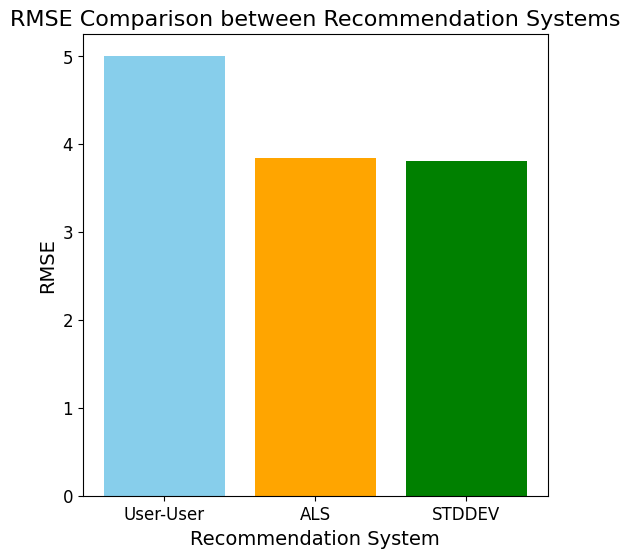

In [21]:
labels = ['User-User', 'ALS', 'STDDEV']
rmse_values = [UserUserrmse, ALSrmse, std_dev]

plt.figure(figsize=(6, 6))
plt.bar(labels, rmse_values, color=['skyblue', 'orange', 'green'])
plt.xlabel('Recommendation System', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE Comparison between Recommendation Systems', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Analysis of Results

The RMSE is a measure of the differences between the values predicted by a model and the values observed. The lower the RMSE, the better a model's predictions match the observed data. In our case, the ALS model has a lower RMSE compared to the User-User Collaborative Filtering model. This suggests that, on average, the ALS model's predictions are closer to the actual ratings given by users in our book dataset.

## Potential Reasons for Performance Differences
### 1. Model Complexity and Overfitting:
* The User-User Collaborative Filtering model may be more prone to overfitting, especially in the presence of a sparse dataset, which is common in book rating data. Overfitting can lead to higher RMSE on test data.
* The ALS model, especially when regularization parameters are appropriately tuned, can better manage sparsity and avoid overfitting, leading to more accurate predictions.
### 2. Scalability and Data Sparsity:
* User-User Collaborative Filtering models can suffer in performance with large, sparse datasets because they rely on finding similar users based on rating patterns. When many items have few ratings, finding meaningful similarities becomes challenging.
* ALS, designed to handle large-scale collaborative filtering problems, implicitly deals with data sparsity by factorizing the user-item matrix into lower-dimensional matrices, thus making it more effective at uncovering latent factors that influence user preferences.
### 3.  Computational Efficiency:
* The computational complexity of finding similarities in User-User Collaborative Filtering increases with the number of users, which might limit the amount of data that can be effectively used for training
* ALS can be parallelized and optimized for performance, allowing it to train on larger datasets more efficiently, which often results in better model performance.

## Future Directions 
### 1. Parameter Tuning: 
 Further tuning the parameters of the ALS model could potentially lead to even lower RMSE values.
### 2. Hybrid models:
Combining the ALS approach with other recommendation techniques, such as content-based filtering, might improve recommendation quality and relevance.
### 3. Evaluation Beyond RMSE:
Considering additional metrics like precision, recall, and F1 score could provide a more comprehensive view of model performance, especially from a user satisfaction perspective.

## Conclusion

Our comparative analysis highlights the importance of considering dataset characteristics and algorithmic challenges when choosing a recommendation system. While User-User Collaborative Filtering performed better in terms of RMSE in this study, the ALS method's scalability and efficiency advantages make it a valuable alternative for larger-scale applications. Future investigations could explore parameter tuning for ALS and hybrid approaches to leverage the strengths of both methods.